In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
Expander_data=pd.read_csv("E:\DataScience\Kaggle\Machine Learning\Expander_data.csv")

In [25]:
import warnings
warnings.filterwarnings("ignore")

# Creating a Fucntion that provide regression analysis

In [7]:
from sklearn.preprocessing import LabelEncoder

In [30]:
def RegressionAnalysis(data):
    
    print("Percentage of missing data is Before Missing Value Treatment ")
    print(100*(data.isna().sum())/len(data))
    
    # Missing Value analysis
    for column in data.columns:
        if ((100*(data[column].isna().sum())/len(data[column]))>70):
            data=data.drop([column], axis=1)
        elif ((100*(data[column].isna().sum())/len(data[column]))<=5):
            data=data[pd.notnull(data[column])]
        else:
            # Lets Split the Categorical Features and Continuous Features
            cont_feature=[x for x in data.select_dtypes(exclude=['object']).columns]
            catg_feature=[x for x in data.select_dtypes(include=['object']).columns]
            # Filling the continuous fetures with median values
            for col in cont_feature:
                data[col]=data[col].fillna(data[col].median())
            for col in catg_feature:
                data[col]=data[col].fillna(method ='ffill')
    print("Percentage of missing data is after Missing Value Treatment ")
    print(100*(data.isna().sum())/len(data))
    data[['date','hour']] = data.Timestamp.str.split(" ",expand=True) 
    data[['hour','min']] = data.hour.str.split(":",expand=True) 
    dat=[]
    years=[]
    months=[]
    days=[]
    def splitDate(date):
        date=str(date)
        dat=date.split("/")
        years.append(dat[2])
        months.append(dat[0])
        days.append(dat[1])
    dates=data.date.values
    for date in dates:
        splitDate(date)
    data['year']=years
    data['day']=days
    data['month']=months
    data=data.drop(['Timestamp','date'], axis=1)
    
    # Outlier Analysis
    # Lets Split the Categorical Features and Continuous Features
    cont_feature=[x for x in data.select_dtypes(exclude=['object']).columns]
    catg_feature=[x for x in data.select_dtypes(include=['object']).columns]  
    for feat in catg_feature:
        data[feat]=data[feat].astype(int)
    # Outlier Analysis
    print("Box plot before outlier Analysis : ")
    import seaborn as sns
    for column in data.columns:
        sns.boxplot(x=data[column])
        plt.show()
    i=0
    while(i==2):
        Q1=data.quantile(0.25)
        Q3=data.quantile(0.75)
        IQR = Q3 - Q1
        print(IQR)
        dataset_clean = dataset_clean[~((dataset_clean < (Q1 - 1.5 * IQR)) |(dataset_clean > (Q3 + 1.5 * IQR))).any(axis=1)]
        i=i+1
    
    # Doing the MIn Max Scaling for the dataset
    # Min_Max Scaling
    from sklearn.preprocessing import MinMaxScaler
    def minmaxSac(dataset):
        sc = MinMaxScaler()
        dataset = sc.fit_transform(dataset)
        return dataset
    target=data['Discharge Pressure (psig)']
    
    # Taking the log value of the target variable
    # target=np.log1p(target)
    
    features=data.drop(['Discharge Pressure (psig)'], axis=1)
    final_features=minmaxSac(features)

    
    # Machine Learning Implementation
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(final_features, target, test_size = 0.2, random_state=42)
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    
    
    # Decision Tree Classifies
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rms = sqrt(mean_squared_error(y_pred, y_test))
    print(" Value of RMSE with Decision Tree : ",rms)
    
    
    # Random Forest Classifier
    from sklearn.ensemble import RandomForestRegressor
    RFmodel = RandomForestRegressor(random_state=1)
    RFmodel.fit(X_train, y_train)
    y_pred_rf = RFmodel.predict(X_test)
    rms_RF = sqrt(mean_squared_error(y_pred_rf, y_test))
    print(" Value of RMSE with Randon Forest Classifier : ",rms_RF)
    
    
    # Linear Regression
    from sklearn.linear_model import LinearRegression 
    lineReg = LinearRegression()
    lineReg.fit(X_train, y_train)
    y_pred_lg = lineReg.predict(X_test)
    rms_lg = sqrt(mean_squared_error(y_pred_lg, y_test))
    print(" Value of RMSE with Linear Regression : ",rms_lg)

    
    # Ridge Regression
    from sklearn.linear_model import Ridge
    rr = Ridge(alpha=0.01)
    rr.fit(X_train, y_train)
    y_pred_rr = rr.predict(X_test)
    rms_rr = sqrt(mean_squared_error(y_pred_rr, y_test))
    print(" Value of RMSE with Ridge Regression : ",rms_rr)
    
    #Lasso Regression
    from sklearn.linear_model import Lasso
    lasReg = Lasso()
    lasReg.fit(X_train, y_train)
    y_pred_lasso = lasReg.predict(X_test)
    rms_lasso = sqrt(mean_squared_error(y_pred_lasso, y_test))
    print(" Value of RMSE with Rasso Regression : ",rms_lasso)
    
    # Elastic Net Regression
    from sklearn.linear_model import ElasticNet
    eNetReg=ElasticNet()
    eNetReg.fit(X_train, y_train)
    y_pred_eNet = eNetReg.predict(X_test)
    rms_eNet = sqrt(mean_squared_error(y_pred_eNet, y_test))
    print(" Value of RMSE with Elastic Net Regression : ",rms_eNet)
    

Percentage of missing data is Before Missing Value Treatment 
Timestamp                       0.0
Suction Pressure (psig)         0.0
Suction Temperature (F)         0.0
Total Flow (gpm)                0.0
Speed (rpm)                     0.0
By-pass Valve Position (%)      0.0
Discharge Pressure (psig)       0.0
Discharge Temperature (F)       0.0
Run Status                    100.0
dtype: float64
Percentage of missing data is after Missing Value Treatment 
Timestamp                     0.0
Suction Pressure (psig)       0.0
Suction Temperature (F)       0.0
Total Flow (gpm)              0.0
Speed (rpm)                   0.0
By-pass Valve Position (%)    0.0
Discharge Pressure (psig)     0.0
Discharge Temperature (F)     0.0
dtype: float64
Box plot before outlier Analysis : 


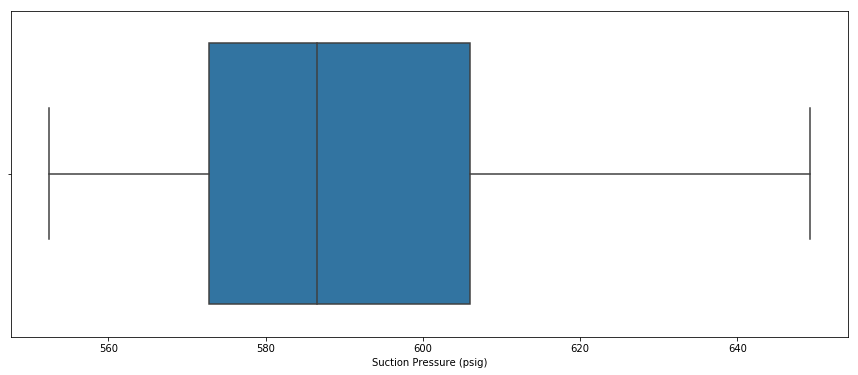

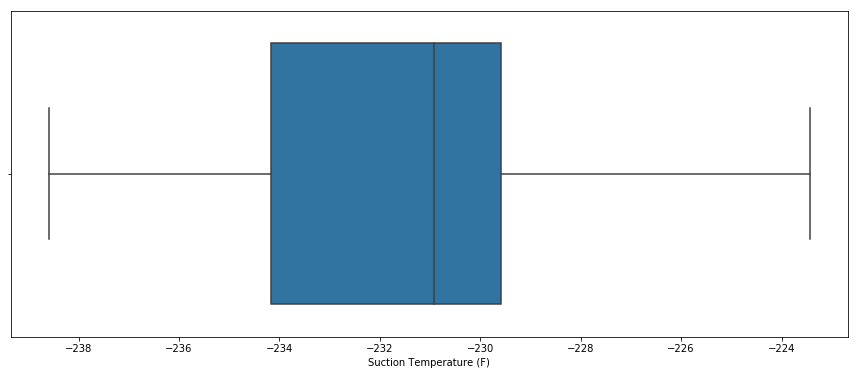

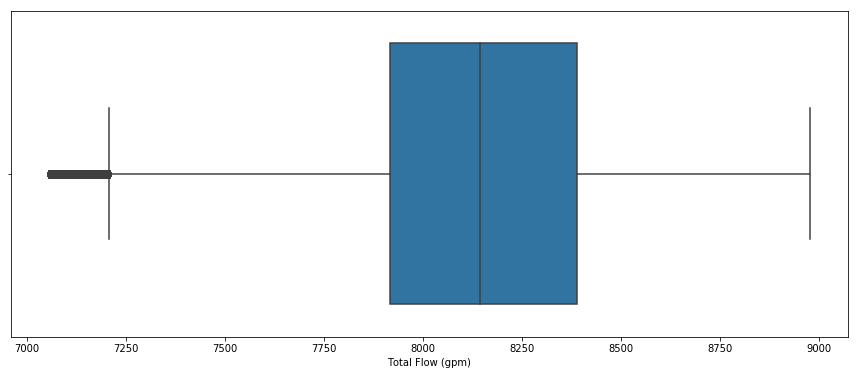

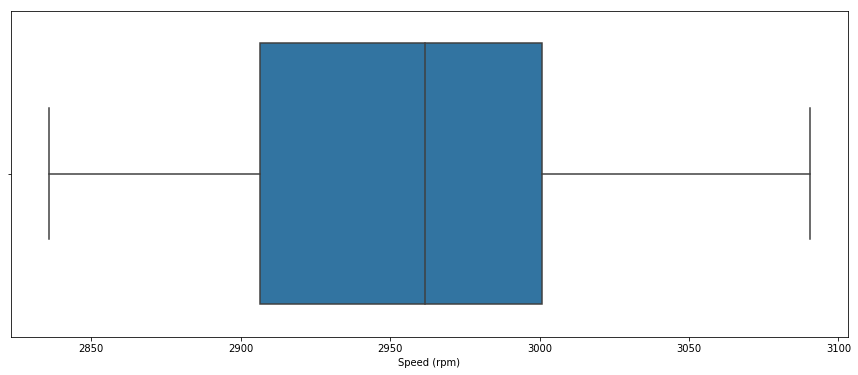

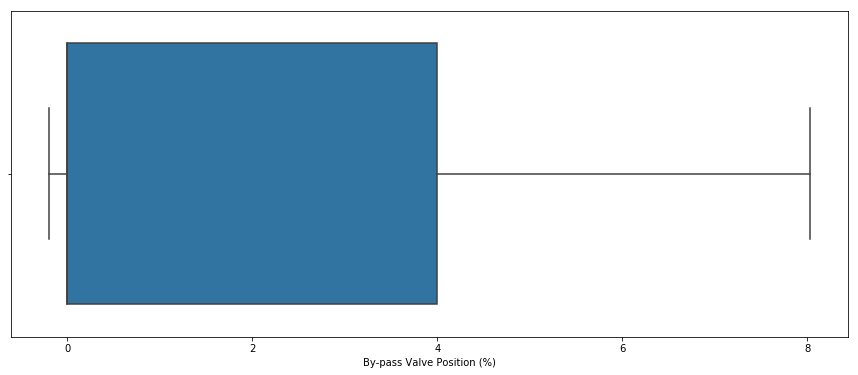

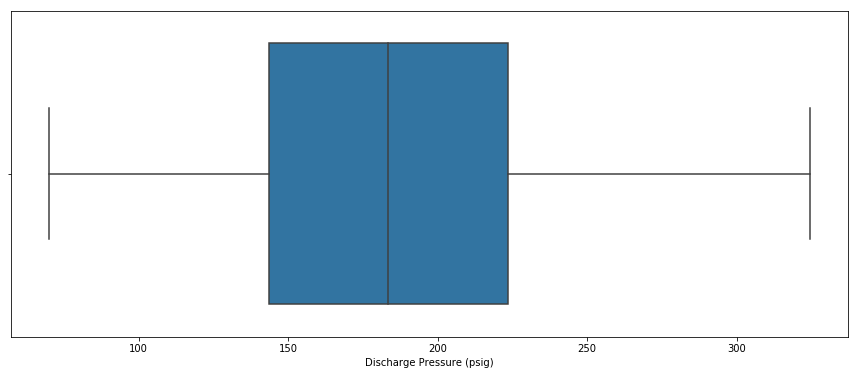

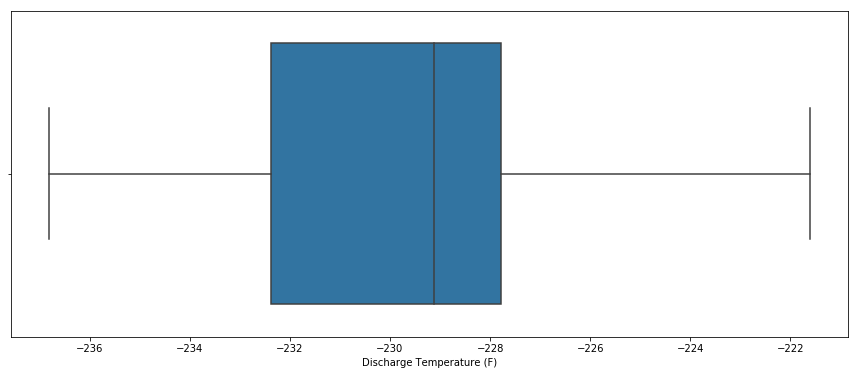

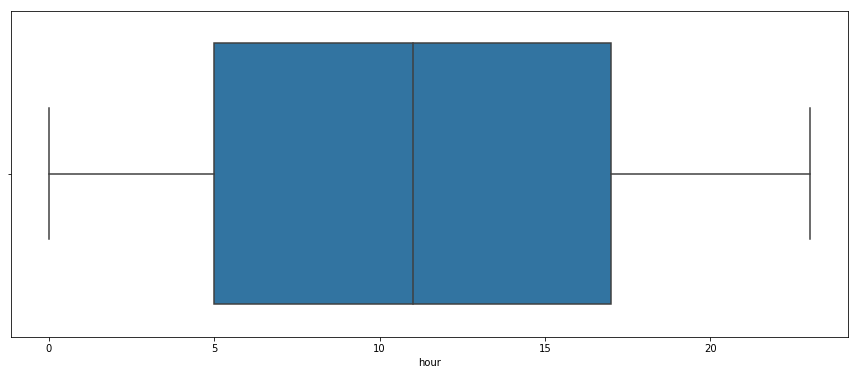

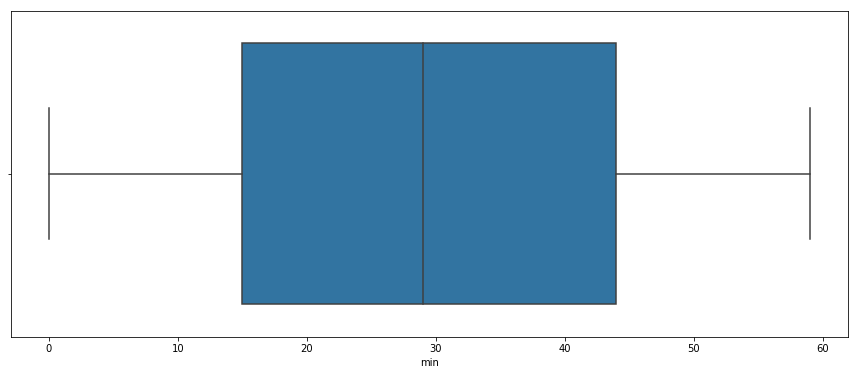

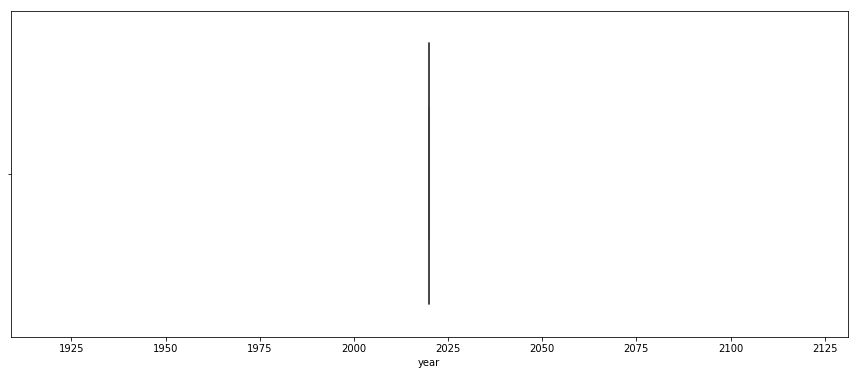

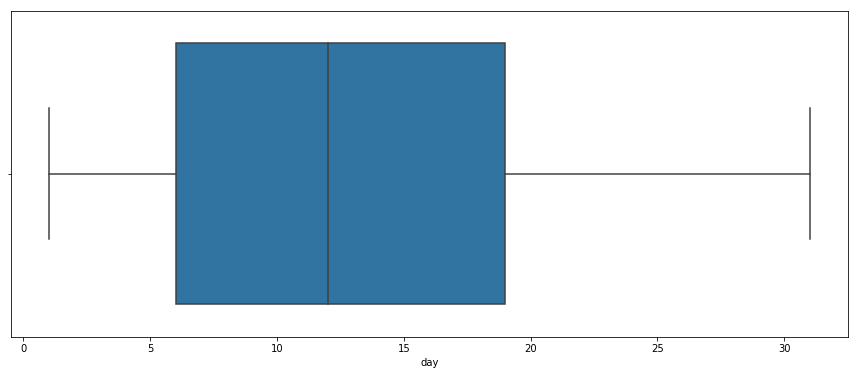

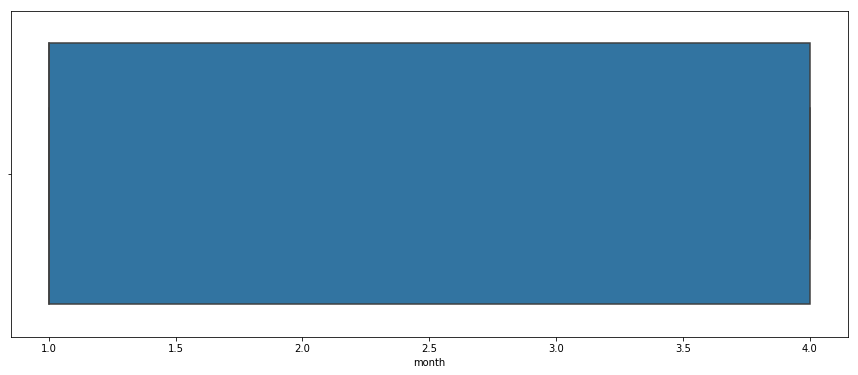

Value of RMSE with Decision Tree :  1.8688808026920043
 Value of RMSE with Randon Forest Classifier :  1.3815592463986823
 Value of RMSE with Linear Regression :  2.205428729243894
 Value of RMSE with Ridge Regression :  2.2054305825835407
 Value of RMSE with Rasso Regression :  6.605390630958027
 Value of RMSE with Elastic Net Regression :  39.803686717662345


In [29]:
RegressionAnalysis(Expander_data)